In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/выбросы.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (2021),Ladder score
0,Afghanistan,1.323756,-1.064528,0.175840,0.005309,-0.915750,0.140351,-1.643841,1.992638,-0.705140,1.584163,1.705039,1.740302,-2.759947
1,Albania,-0.490712,-0.434152,-0.197714,0.153791,-0.447333,-0.299026,0.537659,-0.779728,-0.523864,-0.369233,-0.791865,-0.858346,-0.398304
2,Algeria,-0.226924,-0.069935,-1.060877,-0.536449,-0.280122,0.731513,0.559365,0.044669,-0.504901,0.045648,0.905250,0.869219,-0.607702
3,Argentina,-0.542484,-0.752842,0.364430,-1.154455,0.046419,1.157575,0.483393,-0.301046,-0.205592,-0.714967,-0.206653,-0.162454,0.340961
4,Armenia,-0.453733,-0.686302,-0.977462,0.021361,-0.629182,-0.007883,0.212062,-0.753134,-0.568452,-0.058072,-0.518766,-0.507967,-0.247173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Uruguay,-0.638631,-0.493687,0.455099,-0.777231,-0.043662,-0.261746,0.548512,-0.493848,-0.123590,-0.524813,-0.421231,-0.415505,0.797995
124,Uzbekistan,-0.005046,-0.304575,-0.466092,-0.652827,-0.767680,0.767018,-0.276333,-0.320991,-0.662755,0.218515,-0.460245,-0.454436,0.568568
125,Venezuela,-0.478386,-0.416641,-0.792498,-1.090247,-0.077442,3.376651,0.439980,-0.234562,-0.041588,0.546962,0.846729,0.835155,-0.603150
126,Yemen,0.488016,-0.364110,-0.694576,-0.416059,-0.754168,1.397235,-0.417425,1.228076,-0.666342,1.636023,1.763561,2.431328,-1.726615


In [ ]:
df.dtypes != 'object'

country                           False
child_mort                         True
exports                            True
health                             True
imports                            True
income                             True
inflation                          True
life_expec                         True
total_fer                          True
gdpp                               True
HDI Rank (2021)                    True
GII Rank (2021)                    True
Gender Inequality Index (2021)     True
Ladder score                       True
dtype: bool

In [ ]:
num_columns = df.dtypes[df.dtypes != 'object'].index

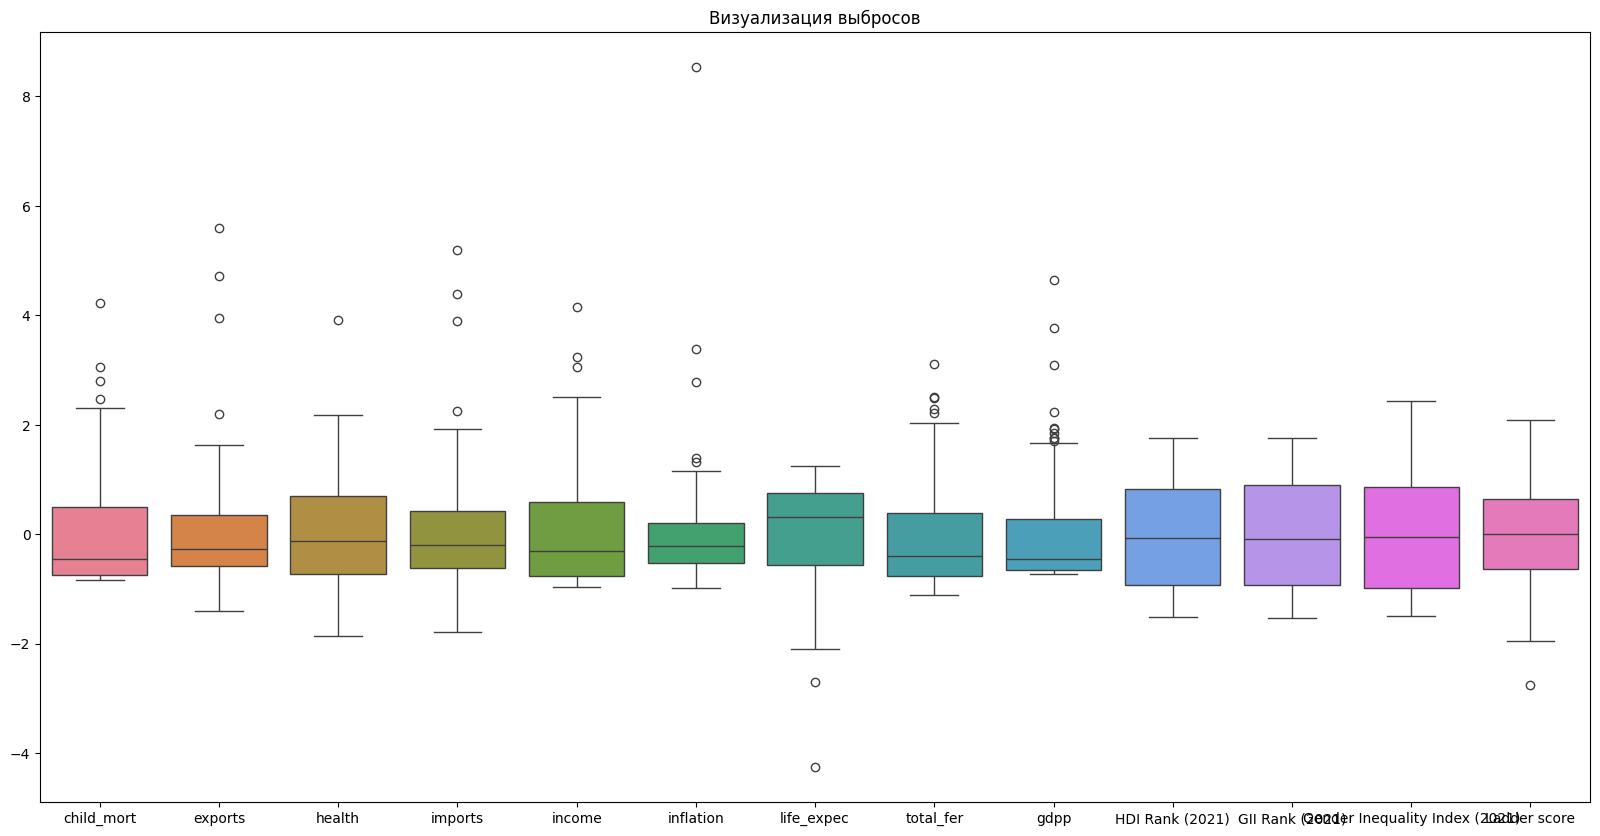

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Визуализация выбросов")
sns.boxplot(data=df[num_columns]);

In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 3 * iqr
        upper_bound = q3 + 3 * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
# Удаление выбросов
df_without_outliers = remove_outliers(df, num_columns)
df_without_outliers.shape

(119, 14)

In [ ]:
df_without_outliers.to_excel('без выбросов.xlsx')

In [ ]:
df2 = df_without_outliers.copy()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
X = df2[num_columns]
dbscan = DBSCAN(eps=2, min_samples=2)

# Выполнение кластеризации
clusters = dbscan.fit_predict(X)
df2['Cluster'] = clusters

# Вывод результата
df2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (2021),Ladder score,Cluster
0,Afghanistan,1.323756,-1.064528,0.175840,0.005309,-0.915750,0.140351,-1.643841,1.992638,-0.705140,1.584163,1.705039,1.740302,-2.759947,0
1,Albania,-0.490712,-0.434152,-0.197714,0.153791,-0.447333,-0.299026,0.537659,-0.779728,-0.523864,-0.369233,-0.791865,-0.858346,-0.398304,0
2,Algeria,-0.226924,-0.069935,-1.060877,-0.536449,-0.280122,0.731513,0.559365,0.044669,-0.504901,0.045648,0.905250,0.869219,-0.607702,0
3,Argentina,-0.542484,-0.752842,0.364430,-1.154455,0.046419,1.157575,0.483393,-0.301046,-0.205592,-0.714967,-0.206653,-0.162454,0.340961,0
4,Armenia,-0.453733,-0.686302,-0.977462,0.021361,-0.629182,-0.007883,0.212062,-0.753134,-0.568452,-0.058072,-0.518766,-0.507967,-0.247173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,United States,-0.719986,-0.980477,3.918631,-1.162481,1.774830,-0.589281,0.798137,-0.593574,1.747085,-1.164420,-0.694330,-0.688023,1.271416,-1
123,Uruguay,-0.638631,-0.493687,0.455099,-0.777231,-0.043662,-0.261746,0.548512,-0.493848,-0.123590,-0.524813,-0.421231,-0.415505,0.797995,0
124,Uzbekistan,-0.005046,-0.304575,-0.466092,-0.652827,-0.767680,0.767018,-0.276333,-0.320991,-0.662755,0.218515,-0.460245,-0.454436,0.568568,0
126,Yemen,0.488016,-0.364110,-0.694576,-0.416059,-0.754168,1.397235,-0.417425,1.228076,-0.666342,1.636023,1.763561,2.431328,-1.726615,-1


In [ ]:
df2['Cluster'].value_counts()

KeyError: 'Cluster'

In [ ]:
df2 = df2.drop('Cluster', axis =1)

К сожалению dbscan не очень подходит для этих данных

In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.3 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
kmedoids = KMedoids(n_clusters=9, init='heuristic', random_state=0)

# Выполнение кластеризации
clusters = kmedoids.fit_predict(X)

# Добавление меток кластеров к DataFrame
df2['Cluster'] = clusters

In [ ]:
df2['Cluster'].value_counts()

Cluster
3    21
0    19
2    17
8    16
6    13
7     9
5     9
1     8
4     7
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)
calinski_harabasz_score_value = calinski_harabasz_score(X, clusters)
print("Calinski-Harabasz Index:", calinski_harabasz_score_value)
davies_bouldin_score_value = davies_bouldin_score(X, clusters)
print("Davies-Bouldin Index:", davies_bouldin_score_value)

Silhouette Score: 0.15703971016990514
Calinski-Harabasz Index: 43.3620675195947
Davies-Bouldin Index: 1.7783894849577875


In [ ]:
from sklearn.metrics import silhouette_samples
import numpy as np

# K-Medoids

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (2021),Ladder score
0,1.323756,-1.064528,0.175840,0.005309,-0.915750,0.140351,-1.643841,1.992638,-0.705140,1.584163,1.705039,1.740302,-2.759947
1,-0.490712,-0.434152,-0.197714,0.153791,-0.447333,-0.299026,0.537659,-0.779728,-0.523864,-0.369233,-0.791865,-0.858346,-0.398304
2,-0.226924,-0.069935,-1.060877,-0.536449,-0.280122,0.731513,0.559365,0.044669,-0.504901,0.045648,0.905250,0.869219,-0.607702
3,-0.542484,-0.752842,0.364430,-1.154455,0.046419,1.157575,0.483393,-0.301046,-0.205592,-0.714967,-0.206653,-0.162454,0.340961
4,-0.453733,-0.686302,-0.977462,0.021361,-0.629182,-0.007883,0.212062,-0.753134,-0.568452,-0.058072,-0.518766,-0.507967,-0.247173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-0.719986,-0.980477,3.918631,-1.162481,1.774830,-0.589281,0.798137,-0.593574,1.747085,-1.164420,-0.694330,-0.688023,1.271416
123,-0.638631,-0.493687,0.455099,-0.777231,-0.043662,-0.261746,0.548512,-0.493848,-0.123590,-0.524813,-0.421231,-0.415505,0.797995
124,-0.005046,-0.304575,-0.466092,-0.652827,-0.767680,0.767018,-0.276333,-0.320991,-0.662755,0.218515,-0.460245,-0.454436,0.568568
126,0.488016,-0.364110,-0.694576,-0.416059,-0.754168,1.397235,-0.417425,1.228076,-0.666342,1.636023,1.763561,2.431328,-1.726615


Text(0.35402045992108644, 119, 'Среднее значение коэффициенты силуэта: 0.25')

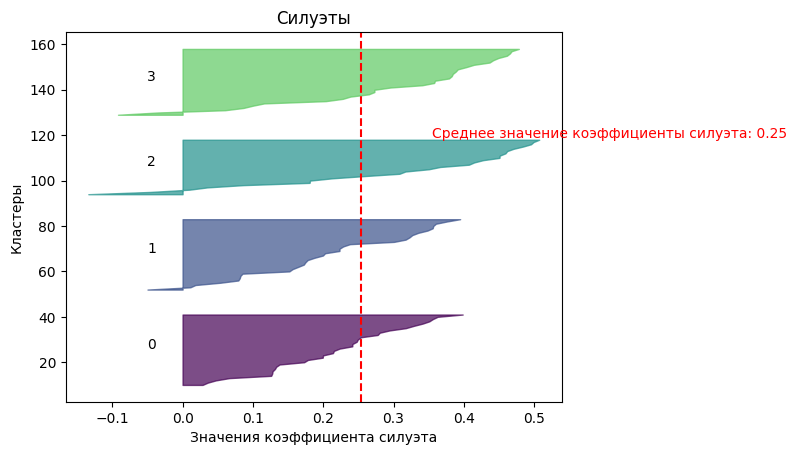

In [ ]:
kmedoids = KMedoids(n_clusters=4, init='heuristic', random_state=0)

# Выполнение кластеризации
clusters = kmedoids.fit_predict(X)

# Добавление меток кластеров к DataFrame
df2['Cluster'] = clusters

silhouette_avg = silhouette_score(X, clusters)

silhouette_vals = silhouette_samples(X, clusters)

# Создание графика Silhouette plot
fig, ax = plt.subplots(1, 1)
y_lower = 10
for i in range(4):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Установка заголовка и меток осей
ax.set_title("Силуэты")
ax.set_xlabel("Значения коэффициента силуэта")
ax.set_ylabel("Кластеры")

# Вертикальная линия для среднего значения Silhouette Score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Отображение среднего значения Silhouette Score
ax.text(silhouette_avg + 0.1, y_lower - 50, 'Среднее значение коэффициенты силуэта: {:.2f}'.format(silhouette_avg),
         color="red")

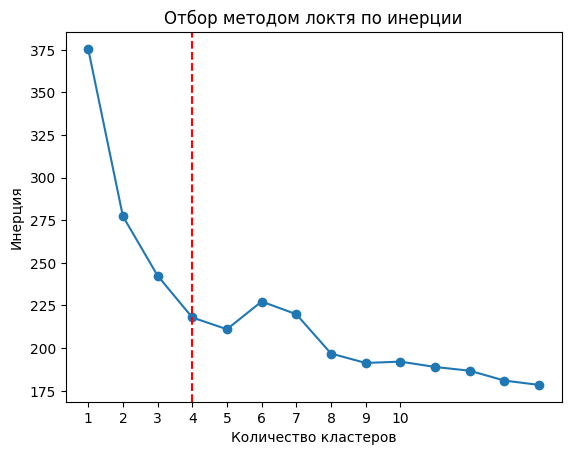

In [ ]:
c

In [ ]:
kmedoids = KMedoids(n_clusters=4, init='heuristic', random_state=0)

# Выполнение кластеризации
clusters = kmedoids.fit_predict(X)
df2['Cluster'] = clusters

In [ ]:
df2['Cluster'].value_counts()

Cluster
0    32
1    32
3    30
2    25
Name: count, dtype: int64

In [ ]:
df2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (2021),Ladder score,Cluster
0,Afghanistan,1.323756,-1.064528,0.175840,0.005309,-0.915750,0.140351,-1.643841,1.992638,-0.705140,1.584163,1.705039,1.740302,-2.759947,3
1,Albania,-0.490712,-0.434152,-0.197714,0.153791,-0.447333,-0.299026,0.537659,-0.779728,-0.523864,-0.369233,-0.791865,-0.858346,-0.398304,0
2,Algeria,-0.226924,-0.069935,-1.060877,-0.536449,-0.280122,0.731513,0.559365,0.044669,-0.504901,0.045648,0.905250,0.869219,-0.607702,1
3,Argentina,-0.542484,-0.752842,0.364430,-1.154455,0.046419,1.157575,0.483393,-0.301046,-0.205592,-0.714967,-0.206653,-0.162454,0.340961,1
4,Armenia,-0.453733,-0.686302,-0.977462,0.021361,-0.629182,-0.007883,0.212062,-0.753134,-0.568452,-0.058072,-0.518766,-0.507967,-0.247173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,United States,-0.719986,-0.980477,3.918631,-1.162481,1.774830,-0.589281,0.798137,-0.593574,1.747085,-1.164420,-0.694330,-0.688023,1.271416,2
123,Uruguay,-0.638631,-0.493687,0.455099,-0.777231,-0.043662,-0.261746,0.548512,-0.493848,-0.123590,-0.524813,-0.421231,-0.415505,0.797995,0
124,Uzbekistan,-0.005046,-0.304575,-0.466092,-0.652827,-0.767680,0.767018,-0.276333,-0.320991,-0.662755,0.218515,-0.460245,-0.454436,0.568568,1
126,Yemen,0.488016,-0.364110,-0.694576,-0.416059,-0.754168,1.397235,-0.417425,1.228076,-0.666342,1.636023,1.763561,2.431328,-1.726615,3


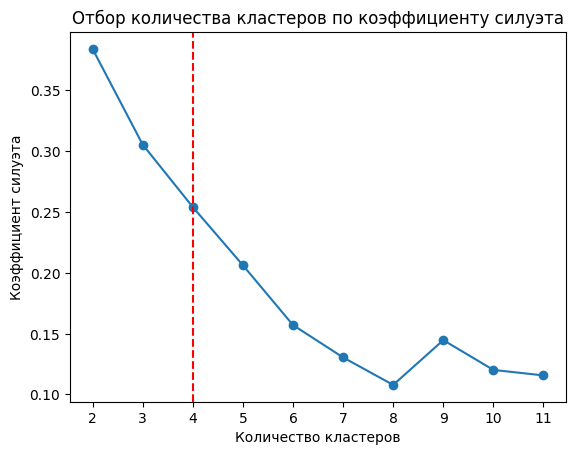

In [ ]:
silhouette_scores = []
k_range = range(2, 12)  # Изменено на range(2, 20), потому что метод силуэта требует по крайней мере двух кластеров

# Вычисление silhouette score для каждого количества кластеров
for k in k_range:
    kmedoids = KMedoids(n_clusters=k, init='heuristic', random_state=0)
    clusters = kmedoids.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)

# Построение графика метода локтя на основе silhouette score
plt.plot(k_range, silhouette_scores, marker='o')
plt.axvline(x=4, color='red', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.title('Отбор количества кластеров по коэффициенту силуэта')
plt.xticks(np.arange(2, 12, step=1))  # Изменено для соответствия диапазону k_range
plt.show()

In [ ]:

for cluster_number in range(4):
    cluster_country = df2[df2['Cluster'] == cluster_number]['country'].tolist()
    print(f"Кластер {cluster_number} включает следующие страны: {', '.join(cluster_country)}")

Кластер 0 включает следующие страны: Albania, Armenia, Bahrain, Belarus, Bosnia and Herzegovina, Bulgaria, Chile, China, Croatia, Estonia, Georgia, Hungary, Kazakhstan, Latvia, Libya, Lithuania, Malaysia, Maldives, Mauritius, Moldova, Montenegro, Panama, Poland, Romania, Saudi Arabia, Serbia, South Korea, Thailand, Tunisia, Turkmenistan, Ukraine, Uruguay
Кластер 1 включает следующие страны: Algeria, Argentina, Azerbaijan, Bangladesh, Bolivia, Botswana, Brazil, Cambodia, Colombia, Dominican Republic, Ecuador, Egypt, El Salvador, Guatemala, India, Indonesia, Iran, Iraq, Jamaica, Jordan, Lebanon, Morocco, Myanmar, Nepal, Paraguay, Peru, Philippines, South Africa, Sri Lanka, Tajikistan, Turkey, Uzbekistan
Кластер 2 включает следующие страны: Australia, Austria, Belgium, Canada, Costa Rica, Cyprus, Finland, France, Germany, Greece, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Netherlands, New Zealand, Portugal, Slovenia, Spain, Sweden, United Arab Emirates, United Kingdom, United States


In [ ]:

for cluster_number in range(4):
    cluster_country = df2[df2['Cluster'] == cluster_number]['country'].tolist()
    print(f"Кластер {cluster_number} включает следующие страны: {', '.join(cluster_country)}")

In [ ]:
df2[df2['Cluster']==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (2021),Ladder score,Cluster
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0
mean,-0.578924,0.341889,-0.141159,0.286472,-0.027335,-0.174871,0.357902,-0.673977,-0.271723,-0.489159,-0.578506,-0.582939,0.172533,0.0
std,0.252866,0.642263,0.798416,0.607001,0.522892,0.463995,0.315400,0.317519,0.270688,0.365282,0.361087,0.402850,0.476555,0.0
min,-0.798876,-0.686302,-1.666541,-0.889596,-0.786259,-0.769648,-0.374013,-1.058959,-0.649942,-1.198994,-1.260035,-1.233058,-0.872636,0.0
25%,-0.730464,-0.136474,-0.743537,-0.107056,-0.427347,-0.505178,0.209349,-0.894412,-0.497853,-0.810043,-0.821126,-0.903360,-0.208936,0.0
50%,-0.625072,0.318797,-0.174140,0.258130,-0.102777,-0.346958,0.385714,-0.799673,-0.321421,-0.464310,-0.606548,-0.605294,0.281329,0.0
75%,-0.492561,0.890513,0.259255,0.737686,0.181539,0.009426,0.548512,-0.452296,-0.106934,-0.235261,-0.391970,-0.342510,0.547173,0.0
max,0.628538,1.628578,1.670055,1.353686,1.549630,1.033307,0.950082,0.091207,0.399174,0.270375,0.320038,0.348517,0.994647,0.0


In [ ]:
pivot_table = df2.drop('country', axis =1).pivot_table(index='Cluster', aggfunc='mean')
pivot_table

,GII Rank (2021),Gender Inequality Index (2021),HDI Rank (2021),Ladder score,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
Cluster,,,,,,,,,,,,,
0,-0.578506,-0.582939,-0.489159,0.172533,-0.578924,0.341889,-0.271723,-0.141159,0.286472,-0.027335,-0.174871,0.357902,-0.673977
1,0.430375,0.454665,0.301707,-0.295938,-0.093181,-0.409430,-0.514283,-0.445578,-0.442437,-0.482784,0.138448,0.014669,-0.130682
2,-1.119584,-1.124829,-1.153357,1.169485,-0.778266,0.090741,1.234776,0.937454,-0.185390,1.184130,-0.511138,0.992626,-0.672024
3,1.276534,1.252690,1.365774,-1.092503,1.473236,-0.492847,-0.673664,-0.207627,-0.059301,-0.859982,0.064592,-1.394578,1.528582


В странах 0 кластера как правило

ластер

In [ ]:
df2.to_excel('Медоиды.xlsx')

Оптимальное значение 4 кластера

# K-Means

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

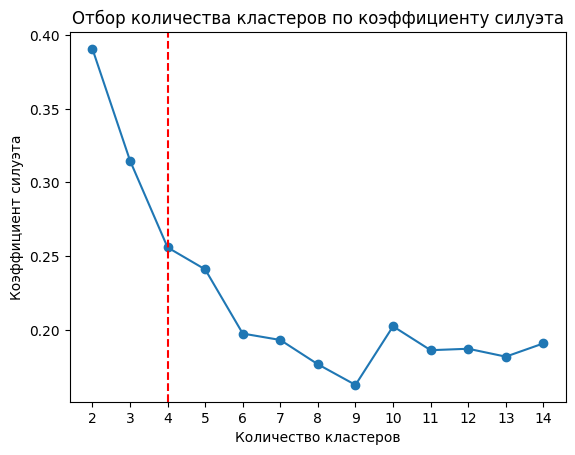

In [ ]:
silhouette_scores = []
k_range = range(2, 15)  # Изменено на range(2, 20), потому что метод силуэта требует по крайней мере двух кластеров

# Вычисление silhouette score для каждого количества кластеров
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)

# Построение графика метода локтя на основе silhouette score
plt.plot(k_range, silhouette_scores, marker='o')
plt.axvline(x=4, color='red', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.title('Отбор количества кластеров по коэффициенту силуэта')
plt.xticks(np.arange(2, 15, step=1))  # Изменено для соответствия диапазону k_range
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

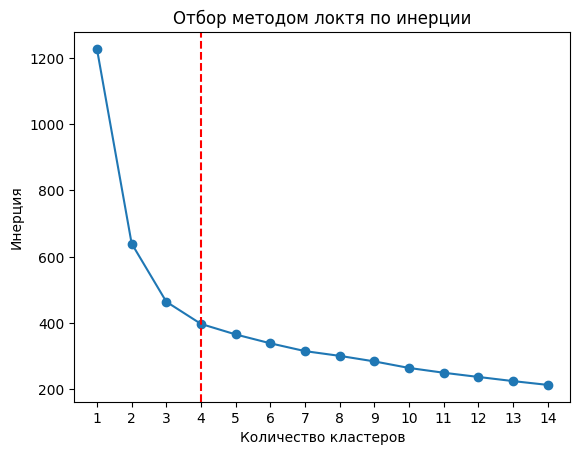

In [ ]:
# Определение диапазона количества кластеров для проверки
k_range = range(1, 15)

# Инициализация списка для хранения значений инерции для каждого количества кластеров
inertia_values = []

# Вычисление инерции для каждого количества кластеров
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Количество кластеров')
plt.axvline(x=4, color='red', linestyle='--')
plt.ylabel('Инерция')
plt.title('Отбор методом локтя по инерции')
plt.xticks(np.arange(1, 15, step=1))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


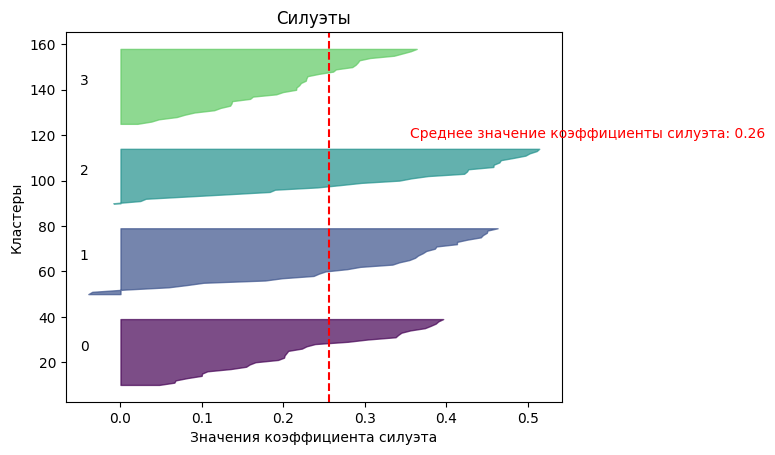

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

# Выполнение кластеризации
clusters = kmeans.fit_predict(X)


silhouette_avg = silhouette_score(X, clusters)

silhouette_vals = silhouette_samples(X, clusters)

# Создание графика Silhouette plot
fig, ax = plt.subplots(1, 1)
y_lower = 10
for i in range(4):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Установка заголовка и меток осей
ax.set_title("Силуэты")
ax.set_xlabel("Значения коэффициента силуэта")
ax.set_ylabel("Кластеры")

# Вертикальная линия для среднего значения Silhouette Score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Отображение среднего значения Silhouette Score
ax.text(silhouette_avg + 0.1, y_lower - 50, 'Среднее значение коэффициенты силуэта: {:.2f}'.format(silhouette_avg),
         color="red")

# Отображение графика
plt.show()

Оптимальное количество кластеров 4

In [ ]:
df2['Cluster'].value_counts()

Cluster
0    32
1    32
3    30
2    25
Name: count, dtype: int64

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)
df2['Cluster'] = clusters
for cluster_number in range(4):
    cluster_country = df2[df2['Cluster'] == cluster_number]['country'].tolist()
    print(f"Кластер {cluster_number} включает следующие страны: {', '.join(cluster_country)}")

Кластер 0 включает следующие страны: Algeria, Azerbaijan, Bangladesh, Bolivia, Brazil, Cambodia, Colombia, Dominican Republic, Ecuador, Egypt, El Salvador, Gabon, Guatemala, India, Indonesia, Iran, Iraq, Jamaica, Jordan, Lebanon, Morocco, Myanmar, Nepal, Paraguay, Peru, Philippines, South Africa, Sri Lanka, Tajikistan, Uzbekistan
Кластер 1 включает следующие страны: Afghanistan, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Chad, Gambia, Ghana, Guinea, Haiti, Kenya, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Pakistan, Rwanda, Senegal, Sierra Leone, Tanzania, Togo, Uganda, Yemen, Zambia
Кластер 2 включает следующие страны: Australia, Austria, Belgium, Canada, Cyprus, Finland, France, Germany, Greece, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Netherlands, New Zealand, Portugal, Slovenia, South Korea, Spain, Sweden, United Arab Emirates, United Kingdom, United States
Кластер 3 включает следующие страны: Albania, Argentina, Armenia, Bahrai

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pivot_table = df2.drop('country', axis =1).pivot_table(index='Cluster', aggfunc='mean')
pivot_table

,GII Rank (2021),Gender Inequality Index (2021),HDI Rank (2021),Ladder score,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
Cluster,,,,,,,,,,,,,
0,0.490400,0.510080,0.366028,-0.266596,-0.057804,-0.371828,-0.531445,-0.541166,-0.451018,-0.512810,0.134327,-0.004279,-0.087855
1,1.261579,1.240849,1.368655,-1.134535,1.464032,-0.509307,-0.677765,-0.149599,-0.015960,-0.863923,0.041868,-1.415561,1.501989
2,-1.154696,-1.161619,-1.180324,1.124910,-0.784281,0.113435,1.263272,0.879862,-0.167411,1.223315,-0.523245,0.991324,-0.690374
3,-0.533109,-0.533300,-0.482105,0.188947,-0.569022,0.262352,-0.288183,-0.083578,0.199705,-0.052968,-0.123852,0.373903,-0.642850


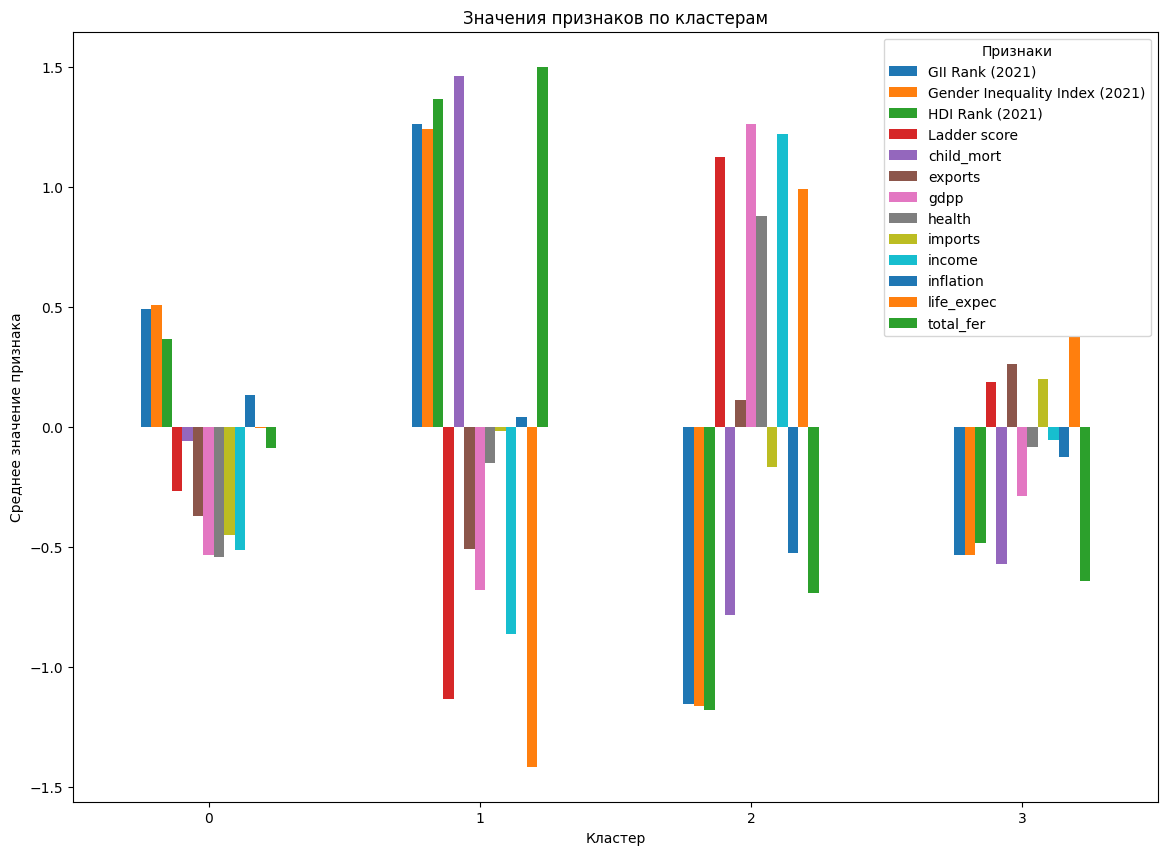

In [ ]:
pivot_table.plot(kind='bar', figsize=(14, 10))
plt.title('Значения признаков по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Среднее значение признака')
plt.xticks(rotation=0)  # Поворот меток по оси x
plt.legend(title='Признаки')
plt.show()

In [ ]:
df2.to_excel('Kmeans.xlsx')

# Иерархический кластерный анализ

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

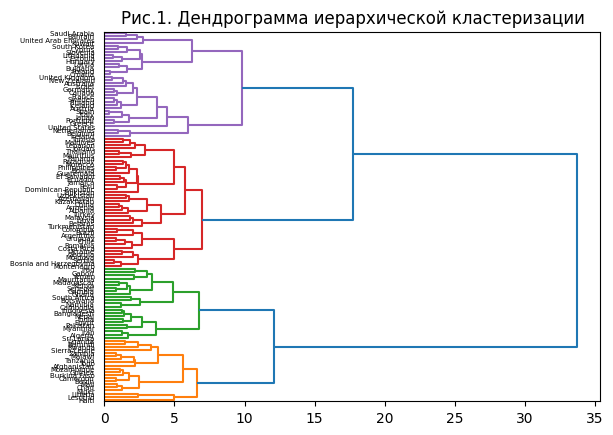

In [ ]:
link = linkage(X, metric='euclidean', method='ward')   # расстояния выбраны
dendrogram(link, orientation='right',labels=df2['country'].tolist(), color_threshold=10) # дендрограмма
plt.title("Рис.1. Дендрограмма иерархической кластеризации")
plt.show()

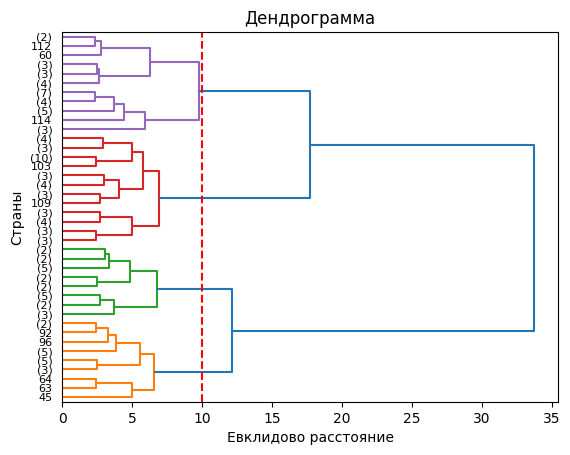

In [ ]:
color_threshold = 10   # расстояние между кластерами
dendrogram(link, orientation='right', truncate_mode='lastp', p=40, color_threshold=color_threshold)
plt.title('Дендрограмма')
plt.ylabel('Страны')
plt.xlabel('Евклидово расстояние')

plt.axvline(x=color_threshold, color='red', linestyle='--')
plt.show()

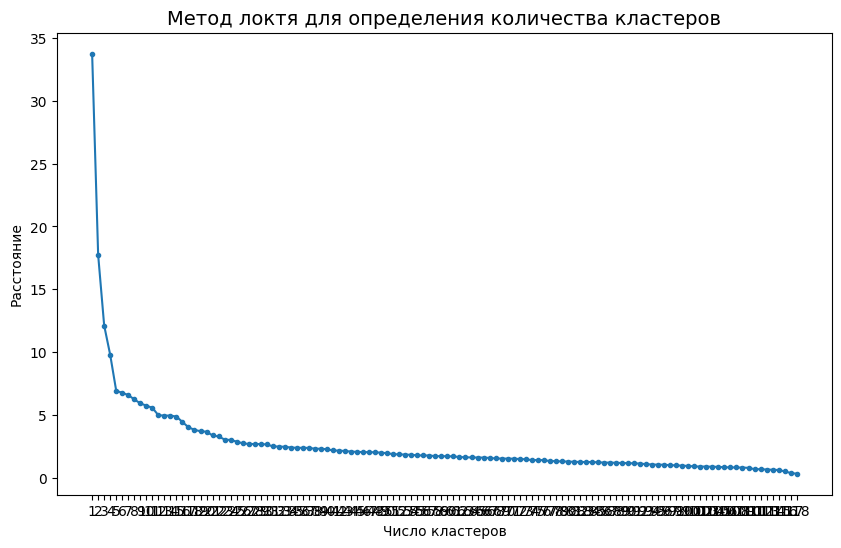

In [ ]:
max_n = len(X) # максимальное количество кластеров
link_1 = linkage(X, metric='euclidean', method='ward')
xticks = np.arange(1,max_n)
yticks = sorted(link_1[:,2],reverse=True)
fig = plt.figure(figsize= (10,6))
plt.title('Метод локтя для определения количества кластеров', size=14)
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.xticks(xticks)

plt.plot(xticks, yticks, marker='.')
plt.show()

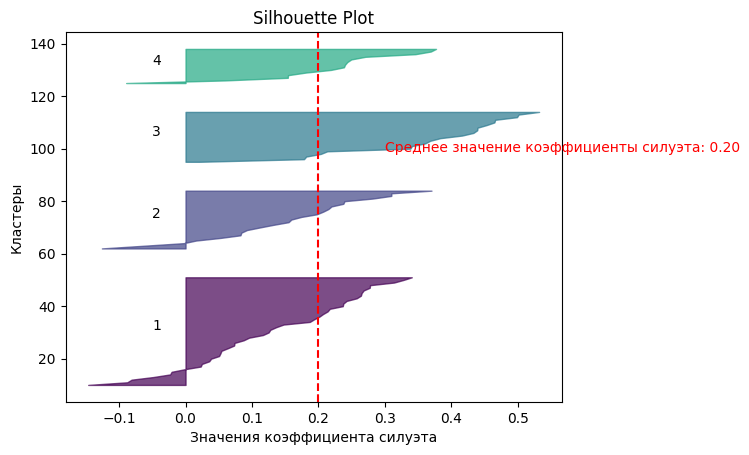

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
k = 5  # количество кластеров

# Выполняем иерархическую кластеризацию
Z = linkage(X, method='ward')

# Вычисляем силуэт
clusters = cut_tree(Z, n_clusters=k).flatten()
silhouette_avg = silhouette_score(X, clusters)
silhouette_vals = silhouette_samples(X, clusters)

# Создаем график Silhouette plot
fig, ax = plt.subplots(1, 1)
y_lower = 10
for i in range(k-1):
    cluster_silhouette_vals = silhouette_vals[clusters == i+1]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    y_lower = y_upper + 10

# Установка заголовка и меток осей
ax.set_title("Silhouette Plot")
ax.set_xlabel("Значения коэффициента силуэта")
ax.set_ylabel("Кластеры")

# Вертикальная линия для среднего значения Silhouette Score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Отображение среднего значения Silhouette Score
ax.text(silhouette_avg + 0.1, y_lower - 50, 'Среднее значение коэффициенты силуэта: {:.2f}'.format(silhouette_avg),
         color="red")

# Отображение графика
plt.show()

# Агломеративный кластерный анализ

# Агломеративная кластеризация

In [ ]:
from sklearn.cluster import AgglomerativeClustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


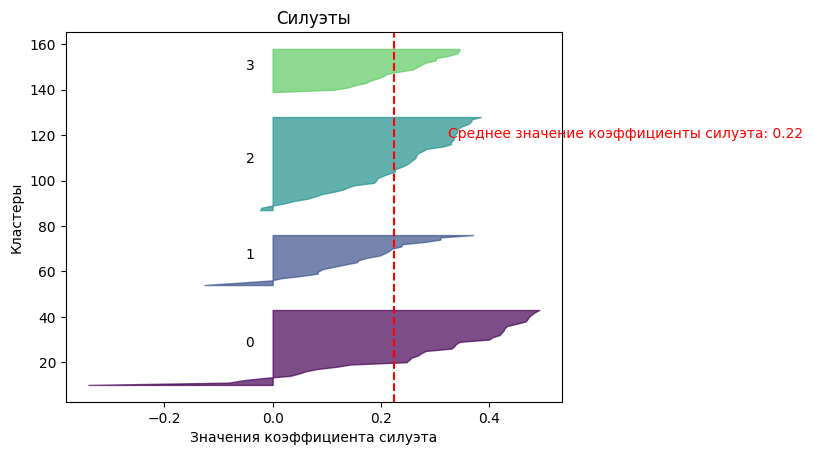

In [ ]:
k = 4
clusters = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward').fit_predict(X)

silhouette_avg = silhouette_score(X, clusters)

silhouette_vals = silhouette_samples(X, clusters)

# Создание графика Silhouette plot
fig, ax = plt.subplots(1, 1)
y_lower = 10
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i)/ k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Установка заголовка и меток осей
ax.set_title("Силуэты")
ax.set_xlabel("Значения коэффициента силуэта")
ax.set_ylabel("Кластеры")

# Вертикальная линия для среднего значения Silhouette Score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Отображение среднего значения Silhouette Score
ax.text(silhouette_avg + 0.1, y_lower - 50, 'Среднее значение коэффициенты силуэта: {:.2f}'.format(silhouette_avg),
         color="red")

# Отображение графика
plt.show()                  # таблица исходных данных

In [ ]:
Для кластерного анализа оптимальное количество кластеров 4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)
df2['Cluster'] = clusters
for cluster_number in range(4):
    cluster_country = df2[df2['Cluster'] == cluster_number]['country'].tolist()
    print(f"Кластер {cluster_number} включает следующие страны: {', '.join(cluster_country)}")

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Обучение модели и предсказание кластеров
clusters = model.fit_predict(X)

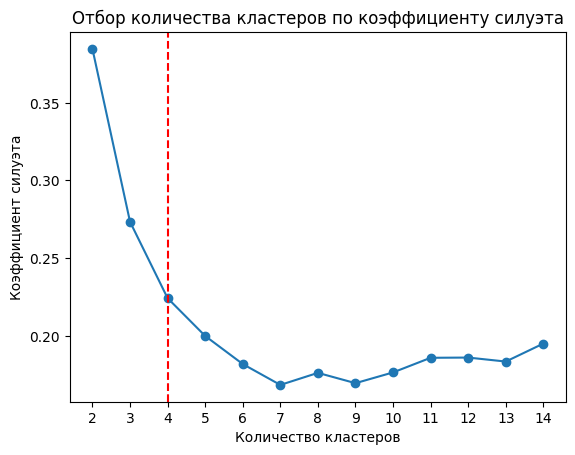

In [ ]:
silhouette_scores = []
k_range = range(2, 15)  # Изменено на range(2, 20), потому что метод силуэта требует по крайней мере двух кластеров

# Вычисление silhouette score для каждого количества кластеров
for k in k_range:
  model = AgglomerativeClustering(n_clusters=k, linkage='ward')
  clusters = model.fit_predict(X)

  silhouette_avg = silhouette_score(X, clusters)
  silhouette_scores.append(silhouette_avg)

# Построение графика метода локтя на основе silhouette score
plt.plot(k_range, silhouette_scores, marker='o')
plt.axvline(x=4, color='red', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.title('Отбор количества кластеров по коэффициенту силуэта')
plt.xticks(np.arange(2, 15, step=1))  # Изменено для соответствия диапазону k_range
plt.show()

По методу локтя и коэффициенту силуэта лучшим оказывается распределение на 4 кластера

In [ ]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Обучение модели и предсказание кластеров
clusters = model.fit_predict(X)
clusters = model.fit_predict(X)
df2['Cluster'] = clusters
for cluster_number in range(4):
    cluster_country = df2[df2['Cluster'] == cluster_number]['country'].tolist()
    print(f"Кластер {cluster_number} включает следующие страны: {', '.join(cluster_country)}")

Кластер 0 включает следующие страны: Australia, Austria, Bahrain, Belgium, Bulgaria, Canada, Croatia, Cyprus, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Latvia, Lithuania, Netherlands, New Zealand, Poland, Portugal, Saudi Arabia, Slovenia, South Korea, Spain, Sweden, United Arab Emirates, United Kingdom, United States
Кластер 1 включает следующие страны: Algeria, Bangladesh, Botswana, Cambodia, Egypt, Gabon, Gambia, Ghana, India, Indonesia, Iran, Iraq, Kenya, Madagascar, Mauritania, Myanmar, Namibia, Nepal, Pakistan, Senegal, South Africa, Sri Lanka, Yemen
Кластер 2 включает следующие страны: Albania, Argentina, Armenia, Azerbaijan, Belarus, Bolivia, Bosnia and Herzegovina, Brazil, Chile, China, Colombia, Costa Rica, Dominican Republic, Ecuador, El Salvador, Georgia, Guatemala, Jamaica, Jordan, Kazakhstan, Lebanon, Libya, Malaysia, Maldives, Mauritius, Moldova, Montenegro, Morocco, Panama, Paraguay, Peru, Philippines, Romania, Se

In [ ]:
df2['Cluster'].value_counts()

Cluster
2    42
0    34
1    23
3    20
Name: count, dtype: int64

In [ ]:
pivot_table = df2.drop('country', axis =1).pivot_table(index='Cluster', aggfunc='mean')
pivot_table

,GII Rank (2021),Gender Inequality Index (2021),HDI Rank (2021),Ladder score,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
Cluster,,,,,,,,,,,,,
0,-1.049473,-1.064022,-1.087647,0.959221,-0.763419,0.247519,0.921546,0.589074,-0.026677,1.010805,-0.480969,0.831973,-0.701707
1,0.923909,0.936291,0.766427,-0.839781,0.428098,-0.401279,-0.591190,-0.787295,-0.427983,-0.622230,0.308306,-0.570786,0.452242
2,-0.154170,-0.128968,-0.092234,0.085739,-0.388284,-0.045087,-0.434249,-0.140204,-0.018673,-0.338352,-0.051031,0.318269,-0.424199
3,1.323676,1.270696,1.468342,-1.219326,1.782550,-0.598540,-0.699471,0.119988,0.006513,-0.918266,-0.030052,-1.681284,1.729030


In [ ]:
нпоказателями ниже среднего

In [ ]:
df2.to_excel('Иерархический.xlsx')

# Метод главных компонент

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

# Проекция данных на двумерное пространство главных компонент
X_pca = pca.fit_transform(X)

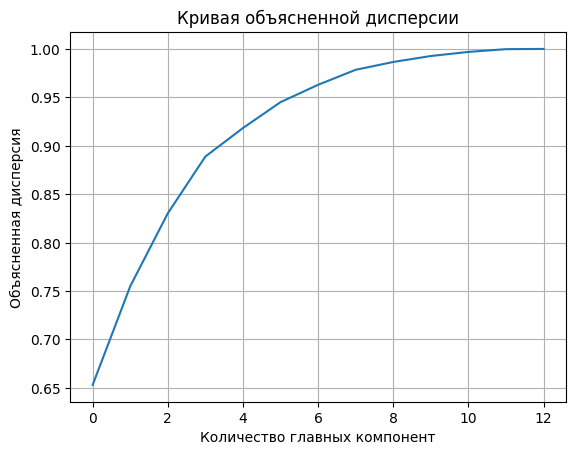

In [ ]:
# Построение кривой объясненной дисперсии
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество главных компонент')
plt.ylabel('Объясненная дисперсия')
plt.title('Кривая объясненной дисперсии')
plt.grid(True)
plt.show()